In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison 

In [124]:
monkeypox = pd.read_csv(r"C:\Users\minel\OneDrive\Documents\Entity Coursework\Final Project\monkeypox.csv")

In [125]:
monkeypox.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class
0,18,2022-07-08 10:12:04,Much of the focus on #monkeypox recently has b...,Twitter Web App,False,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,2,0,2,0,3696,2993,3459,25,"London, England",0,0
1,31,2022-07-09 00:00:00,ICYMI: The first probable case of monkeypox in...,TweetDeck,True,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,2,0,1,0,75836,1753,125528,531,"Charleston, WV",0,0
2,32,2022-07-09 00:00:01,WHO: #Monkeypox outbreak not yet a global publ...,eClincher,False,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0,0,0,0,2852,2381,10615,14,"Utah, USA",0,0
3,33,2022-07-09 00:00:04,"According to the CDC, monkeypox is usually spr...",Sprout Social,True,True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,1,0,1,0,22897,5665,119258,663,Downtown Minneapolis,0,0
4,34,2022-07-09 00:00:07,LGBTQ advocates and health care organizations ...,SocialNewsDesk,True,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0,0,0,0,81296,466,148219,747,"Rochester, NY",0,0


In [126]:
monkeypox1 = monkeypox[[ 'number', 'text', 'user is verified', 'user description', 'user created at','binary_class']]

In [127]:
monkeypox1.head()

,number,text,user is verified,user description,user created at,binary_class
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0


In [128]:
monkeypox1.binary_class.value_counts()

0    4718
1    1069
Name: binary_class, dtype: int64

In [129]:
monkeypox_clean = monkeypox #backup dataset

In [130]:
monkeypox1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5787 entries, 0 to 5786
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            5787 non-null   int64 
 1   text              5787 non-null   object
 2   user is verified  5787 non-null   bool  
 3   user description  5787 non-null   object
 4   user created at   5787 non-null   object
 5   binary_class      5787 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 231.8+ KB


In [131]:
monkeypox1.dropna()

,number,text,user is verified,user description,user created at,binary_class
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0
...,...,...,...,...,...,...
5782,5806,@WHO @DrTedros @GlobalFund @UNICEF @pfizer An ...,False,None,2022-06-25 04:07:19,1
5783,5807,@WHO @DrTedros @GlobalFund @UNICEF @pfizer @Wo...,False,None,2022-06-25 04:07:19,1
5784,5808,@theLouisianaMan It seems we have a new varian...,False,Hermit who loves to read and has 4 dogs that I...,2020-03-21 13:40:39,1
5785,5809,@imminent_news From what I gather 'Monkey Pox'...,False,A well educated mind will always have more que...,2022-03-04 11:46:18,1


<AxesSubplot:ylabel='Frequency'>

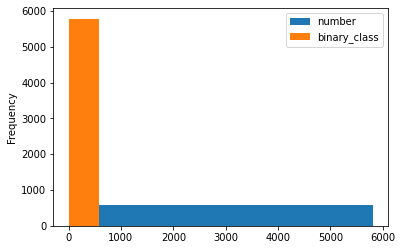

In [132]:
monkeypox1.plot.hist()

In [133]:
monkeypox1.shape

(5787, 6)

In [134]:
monkeypox1.describe()

,number,binary_class
count,5787.000000,5787.000000
mean,2906.135476,0.184724
std,1676.582323,0.388107
min,1.000000,0.000000
25%,1455.500000,0.000000
50%,2906.000000,0.000000
75%,4356.500000,0.000000
max,5810.000000,1.000000


In [135]:
monkeypox1.mean()

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\2477814046.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monkeypox1.mean()


number              2906.135476
user is verified       0.069466
binary_class           0.184724
dtype: float64

In [136]:
monkeypox1.var()

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\1200525271.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monkeypox1.var()


number              2.810928e+06
user is verified    6.465169e-02
binary_class        1.506273e-01
dtype: float64

In [137]:
monkeypox1.std()

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\3148708047.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monkeypox1.std()


number              1676.582323
user is verified       0.254267
binary_class           0.388107
dtype: float64

In [138]:
monkeypox1.shape

(5787, 6)

In [139]:
monkeypox1.head()

,number,text,user is verified,user description,user created at,binary_class
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0


In [140]:
monkeypox1.text.value_counts()

The U.S. May Be Losing the Fight Against Monkeypox, Scientists Say _URL_                                                                                                                                                        56
Just One Week After End of 'Pride Month,' Liberal Cities Are Monkeypox Hotspots via @WestJournalism _URL_                                                                                                                       25
San Francisco politicians on monkeypox response: Federal government has another 'public health failure' _URL_                                                                                                                   16
'Absolutely be concerned.' Monkeypox cases are surging in South Florida _URL_                                                                                                                                                   12
NYC Democrats blast Biden over monkeypox vaccine mess _URL_                                 

In [141]:
monkeypox1['user is verified'].value_counts()

False    5385
True      402
Name: user is verified, dtype: int64

In [142]:
monkeypox1['user description'].value_counts()

None                                                                                                                                                                752
Science reporter covering Covid, monkeypox, HIV, climate | Battling cancer | Contributor: @NYTimes @NBCNews @Guardian @TRF_Stories Also: @TheNation @TheAtlantic     43
Inclusive Emergency Management / DRR Disability-Led Response Supporting @FightForRightUA #Ukraine                                                                    24
Conservatives, happily married, No DM, No train list, MAGA, Trump 2024, :tangerine:. God bless :folded_hands::red_heart: Jesus is Lord :red_heart:                   22
collaboration@support.exbulletin.com                                                                                                                                 21
                                                                                                                                                                

In [143]:
monkeypoxFU =pd.read_csv(r"C:\Users\minel\OneDrive\Documents\Entity Coursework\Final Project\monkeypox-followup.csv")

In [144]:
monkeypoxFU.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,beto_flag,binary_class,ternary_class
0,3047,30/08/2022 19:51,_URL_ Texas health officials on Tuesday report...,Twitter for Android,False,False,You can only turn the other cheek so many time...,10/06/2019 23:56,0,0,0,0,3377,4911,36196,2,TEXAS,False,0,0
1,10879,30/08/2022 07:10,:backhand_index_pointing_left:主页主页 Monkeypox H...,dlvr.it,False,False,稀有优质资源:backhand_index_pointing_right:电报群 _URL_,16/08/2022 08:54,1,0,0,0,3,0,1075,0,None,False,0,0
2,5545,30/08/2022 16:59,:flushed_face::flushed_face::flushed_face::flu...,Twitter for iPhone,False,False,"A safe space for gay,queer,bi,and sex positive...",14/04/2018 15:25,0,0,0,0,388,217,850,1,None,False,0,0
3,4916,30/08/2022 17:42,:pushpin:BREAKING NEWS:police_car_light: The T...,Twitter for iPhone,True,False,Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...,16/04/2009 17:13,0,0,0,0,1622,304,3614,47,"San Antonio, TX",False,0,0
4,2863,30/08/2022 20:02,.@NFPMedCenter is hosting a Monkeypox vaccine ...,Twitter for iPhone,False,True,Treuhaft Chair/Sr. Fellow @communitysols. Lect...,17/05/2009 05:49,4,0,5,0,2245,3340,17065,37,"Cleveland, OH",False,0,0


In [145]:
monkeypoxFU.drop(['beto_flag'], 1)

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\995079959.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  monkeypoxFU.drop(['beto_flag'], 1)


,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class
0,3047,30/08/2022 19:51,_URL_ Texas health officials on Tuesday report...,Twitter for Android,False,False,You can only turn the other cheek so many time...,10/06/2019 23:56,0,0,0,0,3377,4911,36196,2,TEXAS,0,0
1,10879,30/08/2022 07:10,:backhand_index_pointing_left:主页主页 Monkeypox H...,dlvr.it,False,False,稀有优质资源:backhand_index_pointing_right:电报群 _URL_,16/08/2022 08:54,1,0,0,0,3,0,1075,0,None,0,0
2,5545,30/08/2022 16:59,:flushed_face::flushed_face::flushed_face::flu...,Twitter for iPhone,False,False,"A safe space for gay,queer,bi,and sex positive...",14/04/2018 15:25,0,0,0,0,388,217,850,1,None,0,0
3,4916,30/08/2022 17:42,:pushpin:BREAKING NEWS:police_car_light: The T...,Twitter for iPhone,True,False,Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...,16/04/2009 17:13,0,0,0,0,1622,304,3614,47,"San Antonio, TX",0,0
4,2863,30/08/2022 20:02,.@NFPMedCenter is hosting a Monkeypox vaccine ...,Twitter for iPhone,False,True,Treuhaft Chair/Sr. Fellow @communitysols. Lect...,17/05/2009 05:49,4,0,5,0,2245,3340,17065,37,"Cleveland, OH",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,7261,30/08/2022 15:13,Today 8/30/22- sign up below #monkeypox @APIC ...,Twitter Web App,False,True,The nation's leading board-certified subject m...,18/01/2011 22:07,0,0,1,0,646,612,1675,21,"Washington, DC",0,9
496,5756,30/08/2022 16:43,Ugh the second dose of the monkeypox vaccine i...,Twitter for iPhone,False,False,IG: imakediamonds /CashApp: $harrysdreams,03/01/2010 23:36,0,0,0,0,3623,3028,128154,12,"Los Angeles, CA",0,9
497,6668,30/08/2022 15:51,Uh-Oh… I hope he didn't get a case of the Monk...,Twitter for iPhone,False,True,"Real America's Voice News, Correspondent / Fro...",06/02/2017 04:05,5,4,36,0,32211,1163,11695,129,United States,0,9
498,4218,30/08/2022 18:27,Wish Kyle a happy birthday or u will get monke...,Twitter for iPhone,False,True,20❦ #mangoinfinite,22/02/2019 23:02,0,0,2,0,230,174,5076,2,T/H,0,9


In [146]:
monkeypoxFU.shape

(500, 20)

In [147]:
monkeypoxFU.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,beto_flag,binary_class,ternary_class
0,3047,30/08/2022 19:51,_URL_ Texas health officials on Tuesday report...,Twitter for Android,False,False,You can only turn the other cheek so many time...,10/06/2019 23:56,0,0,0,0,3377,4911,36196,2,TEXAS,False,0,0
1,10879,30/08/2022 07:10,:backhand_index_pointing_left:主页主页 Monkeypox H...,dlvr.it,False,False,稀有优质资源:backhand_index_pointing_right:电报群 _URL_,16/08/2022 08:54,1,0,0,0,3,0,1075,0,None,False,0,0
2,5545,30/08/2022 16:59,:flushed_face::flushed_face::flushed_face::flu...,Twitter for iPhone,False,False,"A safe space for gay,queer,bi,and sex positive...",14/04/2018 15:25,0,0,0,0,388,217,850,1,None,False,0,0
3,4916,30/08/2022 17:42,:pushpin:BREAKING NEWS:police_car_light: The T...,Twitter for iPhone,True,False,Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...,16/04/2009 17:13,0,0,0,0,1622,304,3614,47,"San Antonio, TX",False,0,0
4,2863,30/08/2022 20:02,.@NFPMedCenter is hosting a Monkeypox vaccine ...,Twitter for iPhone,False,True,Treuhaft Chair/Sr. Fellow @communitysols. Lect...,17/05/2009 05:49,4,0,5,0,2245,3340,17065,37,"Cleveland, OH",False,0,0


In [148]:
monkeypoxFU.drop(['beto_flag'],axis= 1, inplace = True)

In [149]:
monkeypoxFU_clean = monkeypoxFU #backup dataset

In [150]:
monkeypoxFU.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class
0,3047,30/08/2022 19:51,_URL_ Texas health officials on Tuesday report...,Twitter for Android,False,False,You can only turn the other cheek so many time...,10/06/2019 23:56,0,0,0,0,3377,4911,36196,2,TEXAS,0,0
1,10879,30/08/2022 07:10,:backhand_index_pointing_left:主页主页 Monkeypox H...,dlvr.it,False,False,稀有优质资源:backhand_index_pointing_right:电报群 _URL_,16/08/2022 08:54,1,0,0,0,3,0,1075,0,None,0,0
2,5545,30/08/2022 16:59,:flushed_face::flushed_face::flushed_face::flu...,Twitter for iPhone,False,False,"A safe space for gay,queer,bi,and sex positive...",14/04/2018 15:25,0,0,0,0,388,217,850,1,None,0,0
3,4916,30/08/2022 17:42,:pushpin:BREAKING NEWS:police_car_light: The T...,Twitter for iPhone,True,False,Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...,16/04/2009 17:13,0,0,0,0,1622,304,3614,47,"San Antonio, TX",0,0
4,2863,30/08/2022 20:02,.@NFPMedCenter is hosting a Monkeypox vaccine ...,Twitter for iPhone,False,True,Treuhaft Chair/Sr. Fellow @communitysols. Lect...,17/05/2009 05:49,4,0,5,0,2245,3340,17065,37,"Cleveland, OH",0,0


array([[<AxesSubplot:title={'center':'number'}>,
        <AxesSubplot:title={'center':'retweet_count'}>,
        <AxesSubplot:title={'center':'reply_count'}>],
       [<AxesSubplot:title={'center':'like_count'}>,
        <AxesSubplot:title={'center':'quote_count'}>,
        <AxesSubplot:title={'center':'followers count'}>],
       [<AxesSubplot:title={'center':'following count'}>,
        <AxesSubplot:title={'center':'tweet count'}>,
        <AxesSubplot:title={'center':'listed_count'}>],
       [<AxesSubplot:title={'center':'binary_class'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

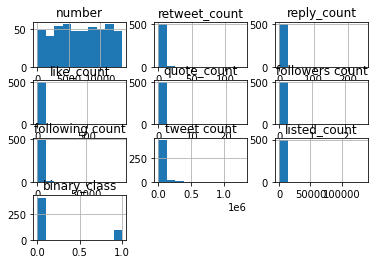

In [172]:
sns.distplot(monkeypoxFU['followers count', 'following count'])

In [151]:
monkeypoxFU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            500 non-null    int64 
 1   created_at        500 non-null    object
 2   text              500 non-null    object
 3   source            500 non-null    object
 4   user is verified  500 non-null    bool  
 5   user has url      500 non-null    bool  
 6   user description  423 non-null    object
 7   user created at   500 non-null    object
 8   retweet_count     500 non-null    int64 
 9   reply_count       500 non-null    int64 
 10  like_count        500 non-null    int64 
 11  quote_count       500 non-null    int64 
 12  followers count   500 non-null    int64 
 13  following count   500 non-null    int64 
 14  tweet count       500 non-null    int64 
 15  listed_count      500 non-null    int64 
 16  user location     500 non-null    object
 17  binary_class    

In [152]:
monkeypox1["binary_class"] = monkeypox1["binary_class"].values.astype("str")

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\2558834313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monkeypox1["binary_class"] = monkeypox1["binary_class"].values.astype("str")


In [153]:
monkeypoxFU["ternary_class"] = monkeypoxFU["ternary_class"].values.astype("str")

In [154]:
def binary_classT (series): 
    if series == "False":
        return 0
    if series == "True": 
        return 1


In [155]:
monkeypox1.head()

,number,text,user is verified,user description,user created at,binary_class
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0


In [156]:
def ternary_class (series): 
    if series == "False":
        return 0
    if series == "True": 
        return 1


In [157]:
monkeypox1['binary_classR'] = monkeypox1['binary_class'].apply(binary_classT)

C:\Users\minel\AppData\Local\Temp\ipykernel_41800\3285789901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monkeypox1['binary_classR'] = monkeypox1['binary_class'].apply(binary_classT)


In [158]:
monkeypoxFU['ternary_classR'] = monkeypoxFU['ternary_class'].apply(ternary_class)

In [159]:
monkeypoxFU.head()

,number,created_at,text,source,user is verified,user has url,user description,user created at,retweet_count,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class,ternary_class,ternary_classR
0,3047,30/08/2022 19:51,_URL_ Texas health officials on Tuesday report...,Twitter for Android,False,False,You can only turn the other cheek so many time...,10/06/2019 23:56,0,0,0,0,3377,4911,36196,2,TEXAS,0,0,None
1,10879,30/08/2022 07:10,:backhand_index_pointing_left:主页主页 Monkeypox H...,dlvr.it,False,False,稀有优质资源:backhand_index_pointing_right:电报群 _URL_,16/08/2022 08:54,1,0,0,0,3,0,1075,0,None,0,0,None
2,5545,30/08/2022 16:59,:flushed_face::flushed_face::flushed_face::flu...,Twitter for iPhone,False,False,"A safe space for gay,queer,bi,and sex positive...",14/04/2018 15:25,0,0,0,0,388,217,850,1,None,0,0,None
3,4916,30/08/2022 17:42,:pushpin:BREAKING NEWS:police_car_light: The T...,Twitter for iPhone,True,False,Anchor-Reporter /WOAI News 4 /KABB Fox 29 / _U...,16/04/2009 17:13,0,0,0,0,1622,304,3614,47,"San Antonio, TX",0,0,None
4,2863,30/08/2022 20:02,.@NFPMedCenter is hosting a Monkeypox vaccine ...,Twitter for iPhone,False,True,Treuhaft Chair/Sr. Fellow @communitysols. Lect...,17/05/2009 05:49,4,0,5,0,2245,3340,17065,37,"Cleveland, OH",0,0,None


In [160]:
monkeypox1.head()

,number,text,user is verified,user description,user created at,binary_class,binary_classR
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0,None
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0,None
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0,None
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0,None
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0,None


In [161]:
monkeypoxFU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   number            500 non-null    int64 
 1   created_at        500 non-null    object
 2   text              500 non-null    object
 3   source            500 non-null    object
 4   user is verified  500 non-null    bool  
 5   user has url      500 non-null    bool  
 6   user description  423 non-null    object
 7   user created at   500 non-null    object
 8   retweet_count     500 non-null    int64 
 9   reply_count       500 non-null    int64 
 10  like_count        500 non-null    int64 
 11  quote_count       500 non-null    int64 
 12  followers count   500 non-null    int64 
 13  following count   500 non-null    int64 
 14  tweet count       500 non-null    int64 
 15  listed_count      500 non-null    int64 
 16  user location     500 non-null    object
 17  binary_class    

In [162]:
monkeypoxFU('user created at',[10/6/2019])
my_data = pd.monkeypoxFU(data=my_dict)
my_data['user created at'] = pd.to_datetime(my_data['user created at'],format='%Y%m%d')
print(my_data)

##update date

TypeError: 'DataFrame' object is not callable

In [163]:
monkeypox1.binary_class.value_counts()

0    4718
1    1069
Name: binary_class, dtype: int64

In [164]:
monkeypoxFU.ternary_class.value_counts()

9    204
0    202
1     94
Name: ternary_class, dtype: int64

In [165]:
MP = pd.merge(monkeypox1, monkeypoxFU, on='number')


In [166]:
MP.number.value_counts()

41      1
2901    1
5342    1
4226    1
3710    1
       ..
36      1
46      1
402     1
457     1
5772    1
Name: number, Length: 212, dtype: int64

In [167]:
MP.binary_class_y.value_counts()

0    164
1     48
Name: binary_class_y, dtype: int64

In [168]:
MP = pd.merge(monkeypox1, monkeypoxFU, on='user created at')

In [169]:
MP.head()

,number_x,text_x,user is verified_x,user description_x,user created at,binary_class_x,binary_classR,number_y,created_at,text_y,...,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,binary_class_y,ternary_class,ternary_classR


In [170]:
MP_Concat = pd.concat([monkeypox1,monkeypoxFU])

In [171]:
MP_Concat.head()

,number,text,user is verified,user description,user created at,binary_class,binary_classR,created_at,source,user has url,...,reply_count,like_count,quote_count,followers count,following count,tweet count,listed_count,user location,ternary_class,ternary_classR
0,18,Much of the focus on #monkeypox recently has b...,False,"Mother of 4, ex wife of 3. Battling health ine...",2011-08-14 19:22:06,0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31,ICYMI: The first probable case of monkeypox in...,True,WCHS-TV serves the Charleston-Huntington marke...,2009-04-17 15:21:43,0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32,WHO: #Monkeypox outbreak not yet a global publ...,False,Patient Engagement | Revenue Cycle Management ...,2019-03-05 19:24:33,0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33,"According to the CDC, monkeypox is usually spr...",True,Home of the Minnesota @Twins and @Timberwolves...,2009-02-18 14:57:13,0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,34,LGBTQ advocates and health care organizations ...,True,Spectrum News 1 offers the best 24-hour local ...,2008-10-27 02:14:13,0,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
